# AUTHOR : SWETHA SRI.S

# K-NN ALGORITHM
## Without Using Library Functions

In [1]:
!pip install matplotlib seaborn --upgrade --quiet

In [2]:
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Read and load the file

In [3]:
dataset=pd.read_csv("flower_species.csv")

In [4]:
dataset

,Sepal_length,Sepal_width,Species
0,5.3,3.7,setosa
1,5.1,3.8,setosa
2,7.2,3.0,virginica
3,5.4,3.4,setosa
4,5.1,3.3,setosa
5,5.4,3.9,setosa
6,7.4,2.8,virginica
7,6.1,2.8,versicolor
8,7.3,2.9,virginica
9,6.0,2.7,versicolor


## Plot the points on the graph

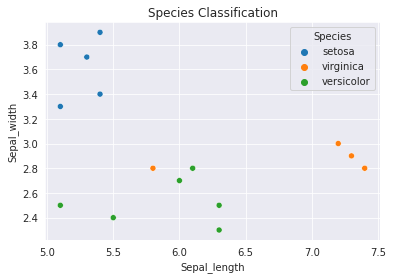

In [14]:
sns.scatterplot(x=dataset.Sepal_length,y=dataset.Sepal_width,hue=dataset.Species)
sns.set_style("darkgrid")
plt.title("Species Classification");

## Create a temporary dataframe for sorting

In [6]:
temp_df=dataset.copy()
display(temp_df)

,Sepal_length,Sepal_width,Species
0,5.3,3.7,setosa
1,5.1,3.8,setosa
2,7.2,3.0,virginica
3,5.4,3.4,setosa
4,5.1,3.3,setosa
5,5.4,3.9,setosa
6,7.4,2.8,virginica
7,6.1,2.8,versicolor
8,7.3,2.9,virginica
9,6.0,2.7,versicolor


### Distance function to calculate the Euclidean Distance and sort the dataframe by distance
### Store it in another dataframe
## Here,K=3

In [12]:
def distance(sl,sw):
    k=3
    for i in range(temp_df.shape[0]):
        temp_df['Distance'][i]=math.sqrt((temp_df.Sepal_length[i]-sl)**2+(temp_df.Sepal_width[i]-sw)**2)
        
    sorted_df=temp_df.sort_values('Distance').round(3).reset_index(drop=True)
    
    print("Sorted Distance Values :")
    display(sorted_df)
    
    print("The ",k," nearest neighbours of the test data are :")
    
    count_setosa=0
    count_vir=0
    count_versi=0
    for i in range(k):
        print(i+1,".",sorted_df.Distance[i]," -",sorted_df.Species[i])
        
        if sorted_df.Species[i]=="setosa":
            count_setosa=count_setosa+1
        elif sorted_df.Species[i]=="virginica":
            count_vir=count_vir+1
        else:
            count_versi=count_versi+1
            
    highest=max(count_setosa,count_vir,count_versi)
    if count_setosa==count_vir==count_versi:
        k1=sorted_df.Species[0]
    elif highest==count_setosa:
        k1="setosa"
    elif highest==count_vir:
        k1="virginica"
    else:
        k1="versicolor"
    df2=pd.DataFrame({'Sepal_length':[sl],'Sepal_width':[sw],'Species':[k1]})
    display(dataset.append(df2,ignore_index=True))

## Get the user's input
## OUTPUT is appended in the last row of the dataframe
## Output is the species to which the given user's input belongs to

In [13]:
n=int(input("Enter the number of test data you have :"))
for i in range(n):
    test_sl=float(input("Enter the sepal length of the flower :"))
    test_sw=float(input("Enter the sepal width of the flower :"))
    distance(test_sl,test_sw)

Enter the number of test data you have :2
Enter the sepal length of the flower :5.6
Enter the sepal width of the flower :3
Sorted Distance Values :


,Sepal_length,Sepal_width,Species,Distance
0,5.8,2.8,virginica,0.283
1,5.4,3.4,setosa,0.447
2,6.0,2.7,versicolor,0.500
3,6.1,2.8,versicolor,0.539
4,5.1,3.3,setosa,0.583
5,5.5,2.4,versicolor,0.608
6,5.1,2.5,versicolor,0.707
7,5.3,3.7,setosa,0.762
8,6.3,2.5,versicolor,0.860
9,5.4,3.9,setosa,0.922


The  3  nearest neighbours of the test data are :
1 . 0.283  - virginica
2 . 0.447  - setosa
3 . 0.5  - versicolor


,Sepal_length,Sepal_width,Species
0,5.3,3.7,setosa
1,5.1,3.8,setosa
2,7.2,3.0,virginica
3,5.4,3.4,setosa
4,5.1,3.3,setosa
5,5.4,3.9,setosa
6,7.4,2.8,virginica
7,6.1,2.8,versicolor
8,7.3,2.9,virginica
9,6.0,2.7,versicolor


Enter the sepal length of the flower :7.1
Enter the sepal width of the flower :3
Sorted Distance Values :


,Sepal_length,Sepal_width,Species,Distance
0,7.2,3.0,virginica,0.100
1,7.3,2.9,virginica,0.224
2,7.4,2.8,virginica,0.361
3,6.3,2.5,versicolor,0.943
4,6.1,2.8,versicolor,1.020
5,6.3,2.3,versicolor,1.063
6,6.0,2.7,versicolor,1.140
7,5.8,2.8,virginica,1.315
8,5.5,2.4,versicolor,1.709
9,5.4,3.4,setosa,1.746


The  3  nearest neighbours of the test data are :
1 . 0.1  - virginica
2 . 0.224  - virginica
3 . 0.361  - virginica


,Sepal_length,Sepal_width,Species
0,5.3,3.7,setosa
1,5.1,3.8,setosa
2,7.2,3.0,virginica
3,5.4,3.4,setosa
4,5.1,3.3,setosa
5,5.4,3.9,setosa
6,7.4,2.8,virginica
7,6.1,2.8,versicolor
8,7.3,2.9,virginica
9,6.0,2.7,versicolor
